In [107]:
import librosa
import librosa.display
import soundfile as sf
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold


import numpy as np
from tqdm import tqdm

In [89]:
example = '../input/train/awake/awake_0.wav'

In [109]:
y, sr = sf.read(example)
print(y.shape,sr)
print(y)

(252075,) 16000
[ 0.00000000e+00 -3.05175781e-05  1.52587891e-04 ...  2.75878906e-02
  2.06909180e-02  6.71386719e-03]


In [90]:
x, sr = librosa.load(example,sr=None)
print(x,x.shape)
print(sr)

[ 0.0000000e+00 -3.0517578e-05  1.5258789e-04 ...  2.7587891e-02
  2.0690918e-02  6.7138672e-03] (252075,)
16000


In [101]:
mfccs = librosa.feature.mfcc(x,n_mfcc=40)
print(mfccs,mfccs.shape)
# (n_mfcc,t)

[[-151.37683   -160.7808    -172.32681   ... -248.71756   -242.85294
  -248.54138  ]
 [ -22.932579   -22.559486   -12.961679  ...   70.233       77.58557
    82.239655 ]
 [ -62.8151     -59.07715    -50.67089   ...  -77.92399    -77.69761
   -74.32124  ]
 ...
 [  -1.2317319   -1.8344018   -4.585079  ...   -1.7694095    9.06593
     5.792616 ]
 [  -3.0311322   -3.2011495   -5.717426  ...    3.3832388    9.0765
    11.404814 ]
 [   1.61467      2.9403796   -2.5783224 ...   13.755706     8.850472
     4.9970436]] (40, 493)


In [105]:
melspec = librosa.feature.melspectrogram(x)
melspec = librosa.power_to_db(melspec).astype(np.float32)
print(melspec,melspec.shape)

[[-20.118084 -19.949594 -15.704489 ... -25.662445 -26.495186 -26.1913  ]
 [-19.565273 -16.456024 -12.099998 ... -20.416016 -15.830742 -20.217136]
 [-22.536604 -22.572062 -15.933156 ... -15.646341 -15.622042 -14.813009]
 ...
 [-27.665861 -25.34539  -25.666113 ... -45.535336 -45.60952  -46.129375]
 [-24.961683 -23.803274 -25.587029 ... -41.195152 -40.378967 -39.259537]
 [-25.849297 -26.540264 -26.599747 ... -41.61257  -41.630405 -41.336273]] (128, 493)


# Plot

In [98]:
def spectplot(mfcc):
    plt.figure(figsize=(10,4))
    librosa.display.specshow(mfcc,x_axis='time')
    plt.colorbar()
    plt.tight_layout()

def waveplot(x,sr):
    plt.figure(figsize=(10,4))
    librosa.display.waveplot(x,sr)
    plt.tight_layout()


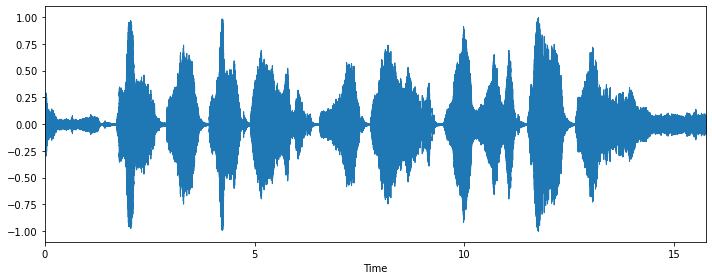

In [93]:
waveplot(x,sr)

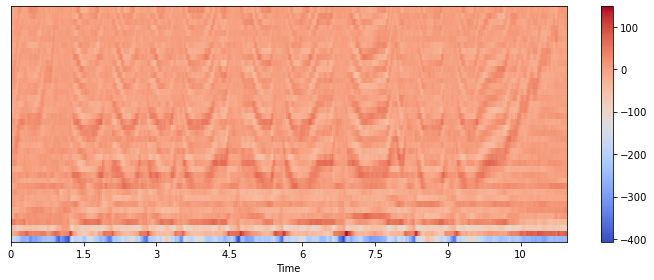

In [102]:
spectplot(mfccs)

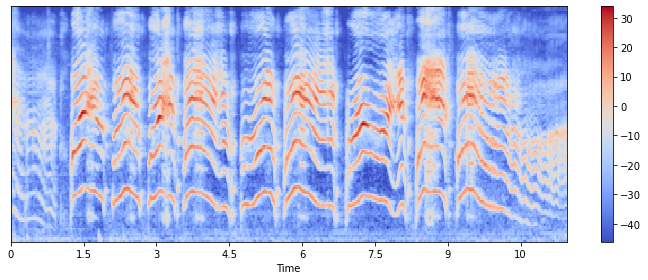

In [106]:
spectplot(melspec)

In [45]:
DATA_PATH = '../input/train/'

def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    print(labels)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)

def wav2mfcc(file_path):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr=8000)

    return mfcc

def save_data_to_array(path=DATA_PATH):
    labels, _, _ = get_labels(path)

    for label in labels:
        mfcc_vectors = []
        
        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = np.zeros((20, 400))
            print(wavfile,wav2mfcc(wavfile).shape)
            #break
            mfcc_feat = wav2mfcc(wavfile)[:, :400]
            mfcc[:, :mfcc_feat.shape[1]] = mfcc_feat
            mfcc_vectors.append(mfcc)
        break    
        mfcc_vectors = np.stack(mfcc_vectors)
            
        
        np.save(label + '.npy', mfcc_vectors)

        
DATA_TEST_PATH = '../input/test'
def save_data_to_array_test(path=DATA_TEST_PATH):
    mfcc_vectors = []
        
    wavfiles = [DATA_TEST_PATH + '/' + wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format('test')):
        mfcc = np.zeros((20, 400))
        mfcc_feat = wav2mfcc(wavfile)[:, :400]
        mfcc[:, :mfcc_feat.shape[1]] = mfcc_feat
        mfcc_vectors.append(mfcc)
            
    mfcc_vectors = np.stack(mfcc_vectors)
    np.save('test.npy', mfcc_vectors)

In [46]:
save_data_to_array()
#save_data_to_array_test()

Saving vectors of label - 'awake':   2%|▏         | 3/160 [00:00<00:08, 17.85it/s]['awake', 'diaper', 'hug', 'hungry', 'sleepy', 'uncomfortable']
../input/train/awake/awake_0.wav (20, 493)
../input/train/awake/awake_1.wav (20, 507)
../input/train/awake/awake_10.wav (20, 544)
Saving vectors of label - 'awake':   4%|▍         | 6/160 [00:00<00:08, 18.69it/s]../input/train/awake/awake_100.wav (20, 487)
../input/train/awake/awake_101.wav (20, 81)
../input/train/awake/awake_102.wav (20, 539)
../input/train/awake/awake_103.wav (20, 491)
Saving vectors of label - 'awake':   6%|▋         | 10/160 [00:00<00:08, 17.35it/s] (20, 615)
../input/train/awake/awake_105.wav (20, 671)
../input/train/awake/awake_106.wav (20, 604)
../input/train/awake/awake_107.wav (20, 531)
Saving vectors of label - 'awake':   9%|▉         | 14/160 [00:00<00:08, 16.67it/s]../input/train/awake/awake_108.wav (20, 771)
../input/train/awake/awake_109.wav (20, 626)
../input/train/awake/awake_11.wav (20, 577)
Saving vectors of

KeyboardInterrupt: 

In [35]:
def get_train_test(split_ratio=0.8, random_state=42):
    labels, indices, _ = get_labels(DATA_PATH)

    path = '../input/' + labels[0] + '.npy'
    X = np.load(path)
    y = np.zeros(X.shape[0])

    
    for i, label in enumerate(labels[1:]):
        
        x = np.load('../input/' + label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))
    
    return X, y
    # return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)


In [36]:
feature_dim_2 = 32


X, Y = get_train_test()
print(X.shape,Y.shape)

skf = StratifiedKFold(n_splits=5)

test_pred = np.zeros((228, 6))

['awake', 'diaper', 'hug', 'hungry', 'sleepy', 'uncomfortable']
(918, 20, 400) (918,)


# Train Model

In [17]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(20, 400, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

In [18]:
for idx, (tr_idx, val_idx) in enumerate(skf.split(X, Y)):
    print(idx)

    feature_dim_1 = 20
    channel = 1
    epochs = 50
    batch_size = 6
    verbose = 1
    num_classes = 6

    X_train, X_test = X[tr_idx], X[val_idx]
    y_train, y_test = Y[tr_idx], Y[val_idx]
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], channel) / 255.0
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], channel) / 255.0

    y_train_hot = to_categorical(y_train)
    y_test_hot = to_categorical(y_test)
    
    model = get_model()

    my_callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10),
        tf.keras.callbacks.ModelCheckpoint(filepath='model-{0}.h5'.format(idx), save_best_only=True),
    ]

    model.fit(X_train, y_train_hot, 
              batch_size=batch_size, 
              epochs=epochs, 
              verbose=verbose, 
              validation_data=(X_test, y_test_hot),
              callbacks=my_callbacks
             )
    model.load_weights('model-{0}.h5'.format(idx))
    
    X_test = np.load('test.npy') / 255.0
    test_pred += model.predict(X_test.reshape(228, 20, 400, 1))

och 12/50
123/123 [==============================] - 5s 40ms/step - loss: 1.7769 - accuracy: 0.2439 - val_loss: 1.7782 - val_accuracy: 0.1957
Epoch 13/50
123/123 [==============================] - 5s 40ms/step - loss: 1.7762 - accuracy: 0.2262 - val_loss: 1.7768 - val_accuracy: 0.2174
Epoch 14/50
123/123 [==============================] - 5s 40ms/step - loss: 1.7751 - accuracy: 0.2275 - val_loss: 1.7752 - val_accuracy: 0.2174
Epoch 15/50
123/123 [==============================] - 5s 40ms/step - loss: 1.7699 - accuracy: 0.2289 - val_loss: 1.7739 - val_accuracy: 0.2011
Epoch 16/50
123/123 [==============================] - 5s 40ms/step - loss: 1.7692 - accuracy: 0.2371 - val_loss: 1.7726 - val_accuracy: 0.2011
Epoch 17/50
123/123 [==============================] - 5s 42ms/step - loss: 1.7696 - accuracy: 0.2330 - val_loss: 1.7713 - val_accuracy: 0.2228
Epoch 18/50
123/123 [==============================] - 5s 39ms/step - loss: 1.7683 - accuracy: 0.2316 - val_loss: 1.7698 - val_accuracy: 0

In [19]:
test_pred = np.zeros((228, 6))
for path in ['model-0.h5', 'model-2.h5', 'model-6.h5'][:1]:
    model.load_weights(path)
    
    X_test = np.load('test.npy') / 255.0
    test_pred += model.predict(X_test.reshape(228, 20, 400, 1))

In [20]:
wavfiles = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]

In [21]:
import pandas as pd
df = pd.DataFrame()

df['id'] = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
df['label'] = [['hug', 'sleepy', 'uncomfortable', 'hungry', 'awake', 'diaper'][x] for x in test_pred.argmax(1)]
df.to_csv('tmp225.csv', index=None)